<a href="https://colab.research.google.com/github/saraFCI/sara-mohamed-abdelhady/blob/main/_Coding_linear_regression_nti_day3_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [1]:
!git clone https://github.com/AbdelrhmanElsaied/ml-1
%cd  ml-1/linear_regression

Cloning into 'ml-1'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 108 (delta 53), reused 108 (delta 53), pack-reused 0
Receiving objects: 100% (108/108), 29.74 MiB | 8.63 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Updating files: 100% (39/39), done.
/content/ml-1/linear_regression


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


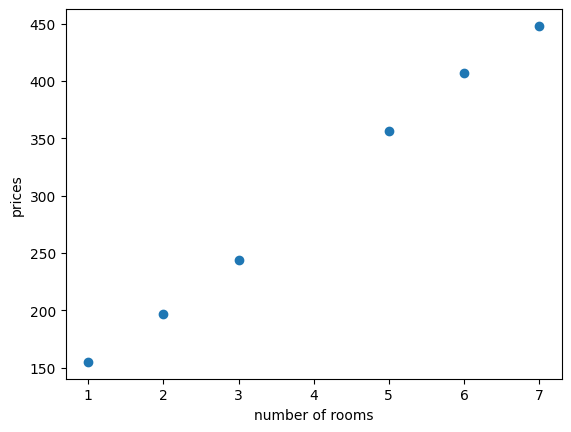

In [4]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [5]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [6]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement square_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room = price_per_room + learning_rate*num_rooms*(price-predicted_price)
    base_price = base_price + learning_rate*(price-predicted_price)


    return price_per_room, base_price

In [7]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement absolute_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price

    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

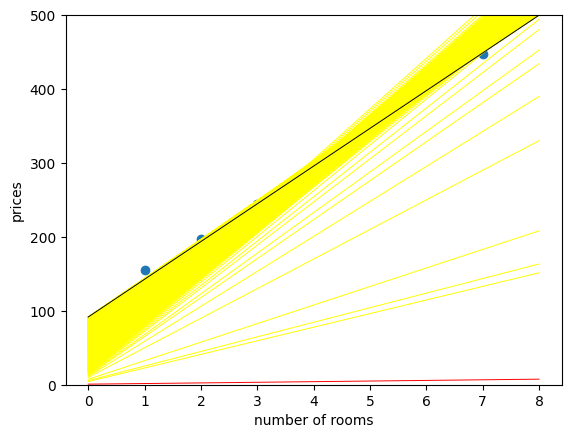

In [8]:
import random as rd

# We set the random seed in order to always get the same results.
rd.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  rd.random() # start with random weight
    base_price =  rd.random() # start with random bias
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    # Convert features and labels to numpy arrays for easier manipulation

    #features = np.array(features)
    #labels = np.array(labels)
    utils.draw_line(price_per_room, base_price, 'red', starting=0, ending=8)

    for epoch in range(epochs):
        # Get a random sample from the dataset
        ix = rd.randint(0, len(features) - 1)
        x_sample = features[ix]
        y_sample = labels[ix]
        price_per_room, base_price = square_trick(base_price, price_per_room, x_sample, y_sample, learning_rate)
        utils.draw_line(price_per_room, base_price, 'yellow', starting=0, ending=8)

    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

Price per room: 51.090196291878996
Base price: 98.96442201255323


(51.090196291878996, 98.96442201255323)

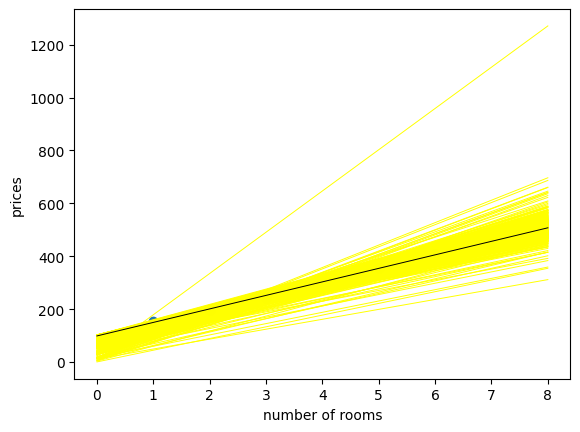

In [ ]:
linear_regression(features, labels, learning_rate = 0.05, epochs = 1000)

Price per room: 0.0
Base price: 5.226622276009188e+269


(0.0, 5.226622276009188e+269)

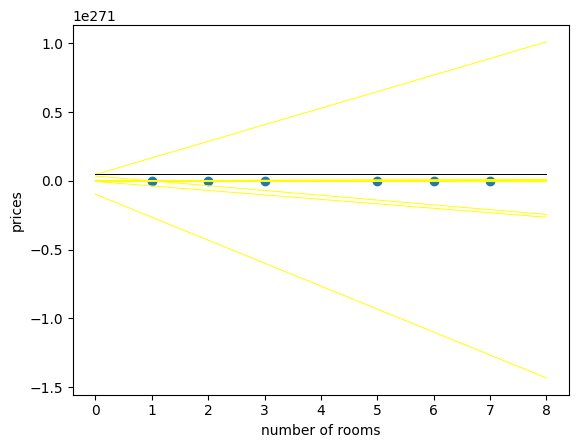

In [ ]:
linear_regression(features, labels, learning_rate = 0.5, epochs = 400)

Price per room: -369.2319621242882
Base price: -3174.1283129517865


(-369.2319621242882, -3174.1283129517865)

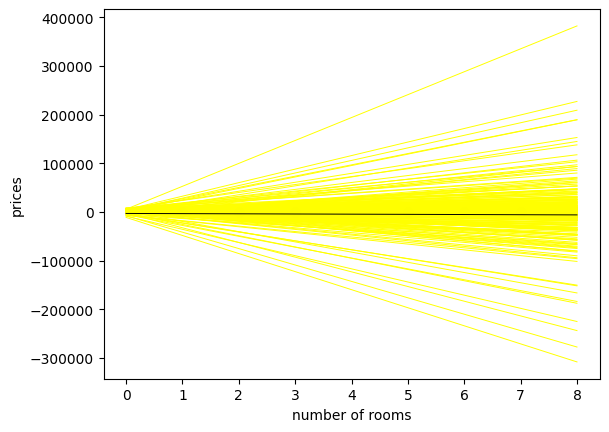

In [ ]:
linear_regression(features, labels, learning_rate = 0.07, epochs = 1000)

Price per room: 50.86506793328304
Base price: 100.42634309088591


(50.86506793328304, 100.42634309088591)

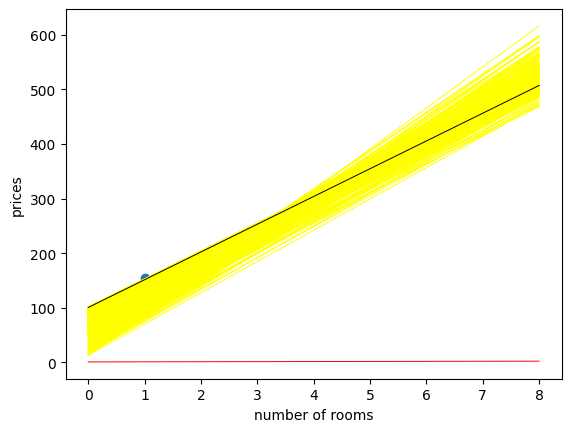

In [ ]:
linear_regression(features, labels, learning_rate = 0.03, epochs = 1000)

Price per room: 1.69309211688574e+108
Base price: 1.694615785311748e+108


(1.69309211688574e+108, 1.694615785311748e+108)

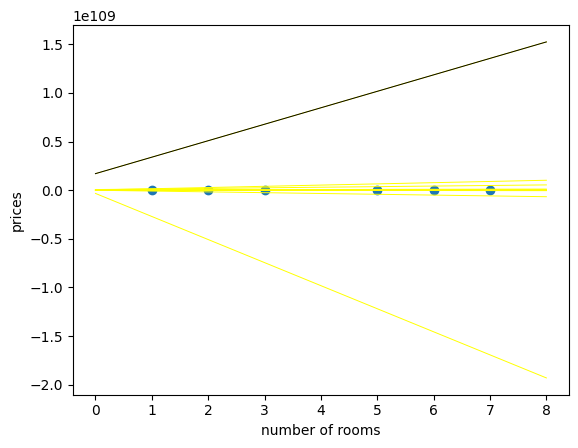

In [ ]:
linear_regression(features, labels, learning_rate = 0.4, epochs = 200)

Price per room: -1.5324861328524954e+93
Base price: -3.408241989433008e+94


(-1.5324861328524954e+93, -3.408241989433008e+94)

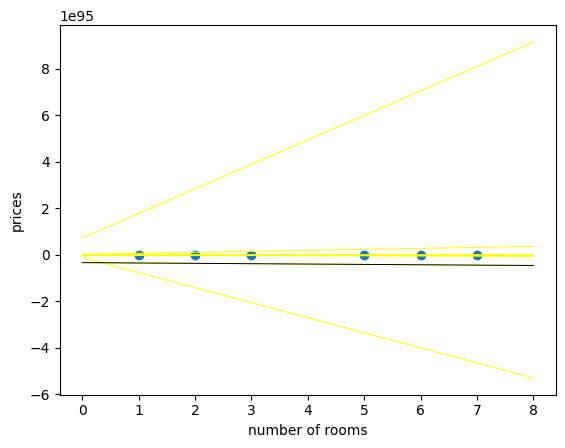

In [ ]:
linear_regression(features, labels, learning_rate = 0.6, epochs = 150)

In [9]:
# The root mean square error function
import math
def rmse(labels, predictions):
    ## TODO ##
    squared_diff=0
    for i,z in zip(labels, predictions):
      squared_diff += [(z-i) ** 2]
      # squared_diff=np.sum(squared_diff)
    error=math.sqrt(squared_diff)
    # calculate the root meen square error between the labels and predictions

    return error

In [10]:
#other way
# The root mean square error function
import math
def rmse(labels, predictions):
    ## TODO ##
    sum_squared_diff = 0
    sum_squared_diff+= (labels - predictions) **2
    error = sum_squared_diff.mean()
    error = error ** 0.5

    # calculate the root meen square error between the labels and predictions

    return error

### Plotting the error function

Price per room: 50.65781332767556
Base price: 99.79504258184782


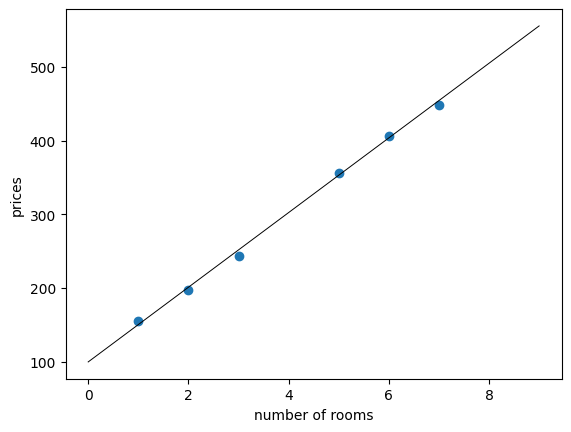

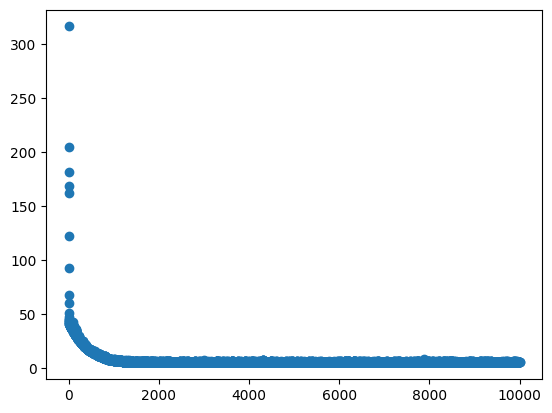

(50.65781332767556, 99.79504258184782)

In [11]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



In [12]:
## TODO ##
import numpy as np
from sklearn.linear_model import LinearRegression
regression=LinearRegression().fit(features.reshape(-1,1), labels)
regression.score(features.reshape(-1,1), labels)
# Use sklearn to implement linear regression that fit our data (features, labels)


0.9979437166148433

In [13]:
## TODO ##
print(regression.coef_)
print(regression.intercept_)

[50.39285714]
99.59523809523819


regression.coef: [50.39285714]
regression.intercept_ 99.59523809523819


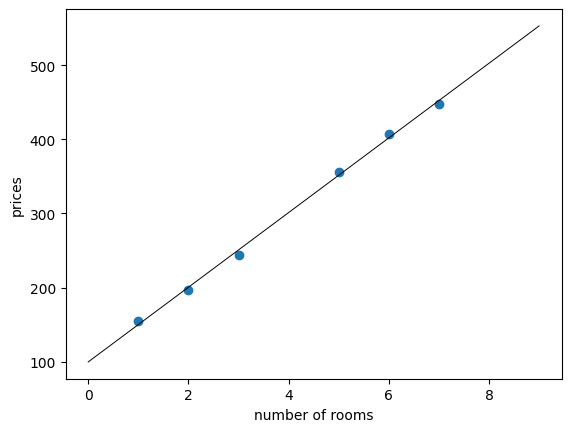

In [18]:
utils.draw_line(regression.coef_, regression.intercept_, 'black', starting=0, ending=9)
utils.plot_points(features, labels)
print('regression.coef:', regression.coef_)
print('regression.intercept_',regression.intercept_)
plt.show()


In [ ]:
## TODO ##
regression.predict([[4]])
# use this model to predict the price of house that contains 4 rooms


array([301.16666667])

### Normal Equation



In [ ]:
def Normal_Equation(features,labels):
    ## TODO ##
    # Use normal equation to get the weights
    # don't forget to concatenate ones to the features

    return W

W = Normal_Equation(features,labels)
print(W)

### Real Example (Predict fuel efficiency)

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Get data

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.head()

#### Clean data

In [ ]:
dataset.isna().sum()

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

In [ ]:
dataset.head()

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [ ]:
dataset.head()

In [ ]:
sns.pairplot(dataset[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']])

In [ ]:
datasetXsingle=dataset[['Horsepower']]
datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

In [ ]:
# use single-variable input to fit linear regression model

In [ ]:
# use multi-variable input to fit linear regression model

In [ ]:
# use Normalized mlti-variable input to fit linear regression model